## 2.LOAD THE DATASET

In [1]:
import pandas as pd

In [3]:
data=pd.read_csv('Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3.PERFORM BELOW VISUALIZATIONS

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

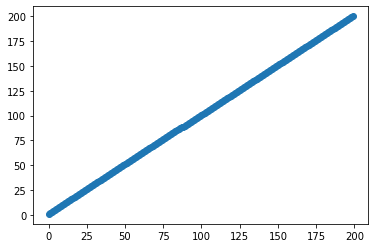

In [6]:
plt.scatter(data.index,data['CustomerID'])
plt.show()

<AxesSubplot:ylabel='CustomerID'>

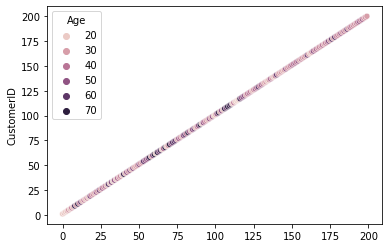

In [7]:
sns.scatterplot(x=data.index,y=data['CustomerID'],hue=data['Age'])

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <BarContainer object of 10 artists>)

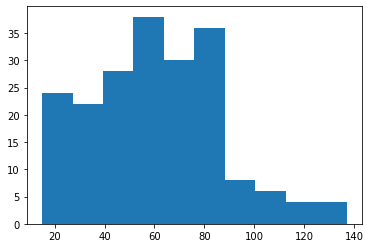

In [8]:
plt.hist(data['Annual Income (k$)'])

## BiVariate Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x22ef98bd910>,
 'caps': [<matplotlib.lines.Line2D at 0x22ef98bdf70>,
 'boxes': [<matplotlib.lines.Line2D at 0x22ef98bd640>],
 'medians': [<matplotlib.lines.Line2D at 0x22ef98cc490>],
 'fliers': [<matplotlib.lines.Line2D at 0x22ef98cc760>],
 'means': []}

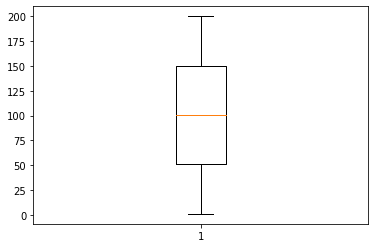

In [9]:
plt.boxplot(data['CustomerID'])

In [11]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


## MultiVariate Analysis

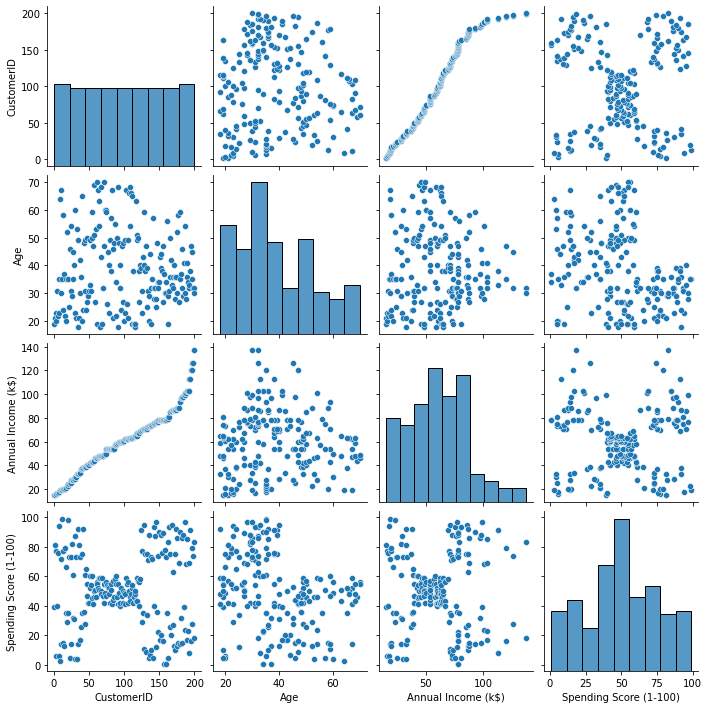

In [12]:
sns.pairplot(data)

## 4.Perform Descriptive statistics on Dataset

In [13]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 5.HANDLE THE MISSING VALUES

In [14]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
#No Null values present in this dataset
#incase age,region column has missing values we can us below code:
data['Age'].fillna(data['Age'].mean(),inplace=True)

## 6.FIND THE OUTLIERS AND REPLACE THE OUTLIERS

In [16]:
import seaborn as sns

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

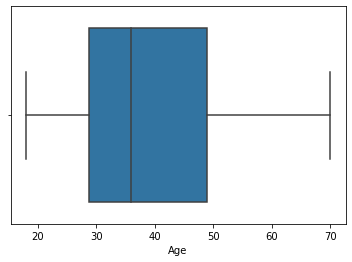

In [17]:
sns.boxplot(data.Age)

In [18]:
perc99=data.Age.quantile(0.99)
perc99

69.00999999999999

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

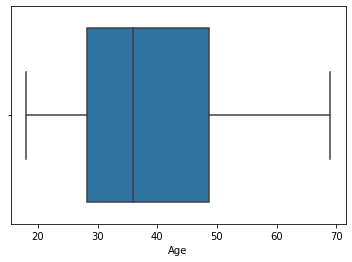

In [19]:
##If outlier is present
data=data[data.Age<=perc99]
sns.boxplot(data.Age)

## 7.CHECK THE CATAGORICAL COLUMN AND PERFORM ENCODING

In [20]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
data.Gender=le.fit_transform(data.Gender)

C:\Users\anamika\AppData\Local\Temp\ipykernel_10560\79342935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Gender=le.fit_transform(data.Gender)


In [23]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## 8.SCALING THE DATA

## Standization

In [24]:
x=data[['Annual Income (k$)','Spending Score (1-100)']]

In [25]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scale=StandardScaler()

In [28]:
st_scale=scale.fit_transform(x)

In [29]:
st_scale

array([[-1.73750289, -0.430647  ],
       [-1.73750289,  1.19203558],
       [-1.6994764 , -1.70561189],
       [-1.6994764 ,  1.03749438],
       [-1.66144992, -0.3920117 ],
       [-1.66144992,  0.99885908],
       [-1.62342344, -1.70561189],
       [-1.62342344,  1.69429448],
       [-1.58539696, -1.82151779],
       [-1.58539696,  0.84431789],
       [-1.58539696, -1.39652949],
       [-1.58539696,  1.88747097],
       [-1.54737048, -1.35789419],
       [-1.54737048,  1.03749438],
       [-1.54737048, -1.43516479],
       [-1.54737048,  1.11476498],
       [-1.509344  , -0.5851882 ],
       [-1.509344  ,  0.61250609],
       [-1.43329104, -0.817     ],
       [-1.43329104,  1.84883567],
       [-1.39526456, -0.5851882 ],
       [-1.39526456,  0.88295318],
       [-1.35723808, -1.74424719],
       [-1.35723808,  0.88295318],
       [-1.24315864, -1.39652949],
       [-1.24315864,  1.23067088],
       [-1.24315864, -0.7010941 ],
       [-1.24315864,  0.41932959],
       [-1.20513215,

## Normalization

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
min_max=MinMaxScaler(feature_range=(0,1))

In [32]:
norm_scal=min_max.fit_transform(x)

In [33]:
norm_scal

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

## 9.PERFORM ANY OF THE CLUSTERING ALGORITHMS

In [34]:
from sklearn.cluster import KMeans

In [35]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)   
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

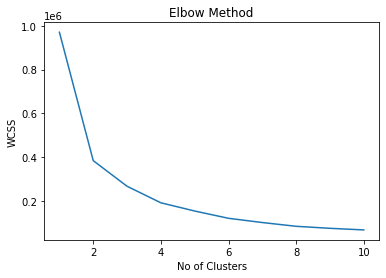

In [36]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')

In [37]:
km_model=KMeans(n_clusters=3, init='k-means++',random_state=0)

In [38]:
ykmeans=km_model.fit_predict(data)

In [39]:
print(ykmeans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [40]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## 10.ADD CLUSTER DATA WITH MAIN DATASET

In [41]:
data['Kclus']=pd.Series(ykmeans)

C:\Users\anamika\AppData\Local\Temp\ipykernel_10560\1331426084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Kclus']=pd.Series(ykmeans)


In [42]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Kclus
0,1,1,19,15,39,2.0
1,2,1,21,15,81,2.0
2,3,0,20,16,6,2.0
3,4,0,23,16,77,2.0
4,5,0,31,17,40,2.0


In [43]:
data['Kclus'].unique()

array([ 2.,  1.,  0., nan])

In [44]:
data['Kclus'].mode()

0    0.0
1    1.0
Name: Kclus, dtype: float64

In [45]:
data['Kclus'].fillna(data['Kclus'].mode()[0],inplace=True)

C:\Users\anamika\AppData\Local\Temp\ipykernel_10560\3106135191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Kclus'].fillna(data['Kclus'].mode()[0],inplace=True)


In [46]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Kclus                     0
dtype: int64

In [47]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Kclus
0,1,1,19,15,39,2.0
1,2,1,21,15,81,2.0
2,3,0,20,16,6,2.0
3,4,0,23,16,77,2.0
4,5,0,31,17,40,2.0


In [48]:
data['Kclus']=data['Kclus'].astype('int32')

C:\Users\anamika\AppData\Local\Temp\ipykernel_10560\1181047468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Kclus']=data['Kclus'].astype('int32')


In [49]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Kclus
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2


In [50]:
data.Kclus.value_counts()

0    70
1    68
2    60
Name: Kclus, dtype: int64

## 11.SPLIT THE DATA INTO DEPENDENT AND INDEPENDENT

In [51]:
y=data['Spending Score (1-100)']

In [52]:
x=data.drop('Spending Score (1-100)',axis=1)

In [53]:
print(x)

     CustomerID  Gender  Age  Annual Income (k$)  Kclus
0             1       1   19                  15      2
1             2       1   21                  15      2
2             3       0   20                  16      2
3             4       0   23                  16      2
4             5       0   31                  17      2
..          ...     ...  ...                 ...    ...
195         196       0   35                 120      0
196         197       0   45                 126      0
197         198       1   32                 126      0
198         199       1   32                 137      0
199         200       1   30                 137      0

[198 rows x 5 columns]


## 12.SPLIT THE DATA INTO TRAINING AND TESTING

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [56]:
x_train.shape

(158, 5)

In [57]:
y_train.shape

(158,)

In [58]:
x_test.shape

(40, 5)

In [59]:
y_test.shape

(40,)

## 13.BUILD THE MODEL

In [60]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

## 14.TRAIN THE MODEL

In [61]:
lr.fit(x_train,y_train)

LinearRegression()

## 15.TEST THE MODEL

In [62]:
y_pred=lr.predict(x_test)
y_pred

array([43.25047645, 57.02908429, 50.20251649, 55.70711785, 57.0140705 ,
       49.60489193, 64.61219681, 46.53528748, 43.26507074, 58.17515061,
       41.82613422, 27.61825956, 49.55074478, 56.19413575, 40.74487627,
       32.8060876 , 56.80631332, 38.06013082, 52.93130222, 59.03428492,
       48.02728525, 43.94998595, 29.55712152, 56.16529581, 50.91462054,
       60.97813037, 46.01006058, 57.58967359, 58.98854957, 54.6286957 ,
       63.4880341 , 63.06657573, 60.57732223, 45.44839871, 61.37087733,
       35.74811876, 70.86189719, 57.40274757, 43.5976173 , 43.78491393])

## 16.MEASURE THE PERFORMANCE USING EVALUATION MATRICS

In [63]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
acc=r2_score(y_pred,y_test)
acc

-6.9615355672637085

In [64]:
mae = mean_absolute_error(y_test,y_pred)

In [65]:
mae

22.328010805801437

In [66]:
mse = mean_squared_error(y_test,y_pred)

In [67]:
mse

783.1652052891496